## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


## Exploratory data analysis

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
#observe the different feature type present in the data
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Hence, we can conclude that there are no null values in the dataset.

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

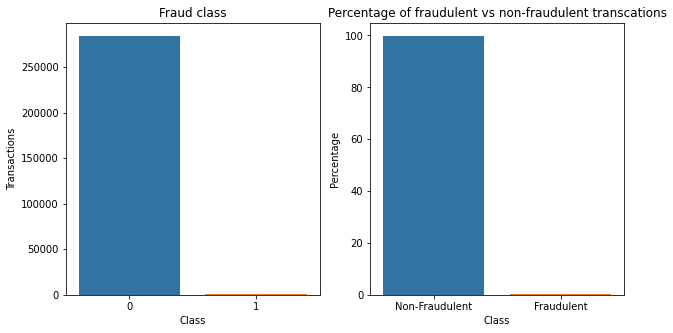

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.xlabel("Class")
plt.ylabel("Transactions")
plt.title("Fraud class")

plt.subplot(1,2,2)
percent = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_percent = pd.DataFrame(percent) 
sns.barplot(x='Class',y='Percentage', data=df_percent)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

It is evident that there is a very high class imbalance in the dataset.

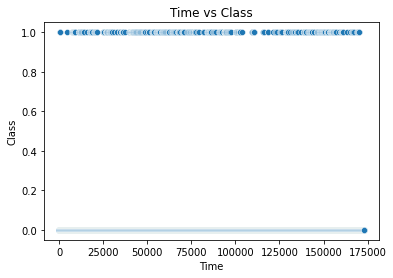

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class")
plt.show()

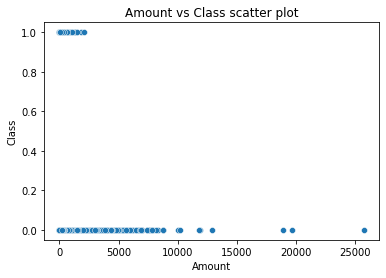

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

In [6]:
# Drop unnecessary columns
#We see that time is not an indicative of the amount of frauds happening. Hence that column can be dropped.
df = df.drop("Time", axis = 1)

### Splitting the data into train & test data

In [5]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [6]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 77)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

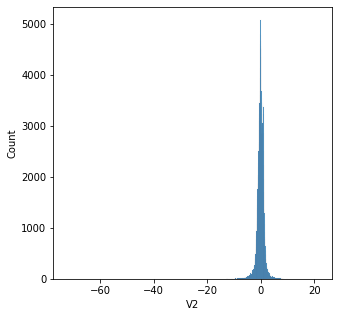

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
#Just randomly, we take the variable 'V2' and plot its histogram.
plt.figure(figsize=(5,5))
sns.histplot(data=X_train, x='V2')

Clearly, the variable is highly skewed.

In [ ]:
#Let's check for skewness of the variables. If they exceed the range [-1,1], we would do power transform operation to make the distribution more gaussian.
n = X_train.columns
skewed = []
for i in n:
    skewed.append(X_train[i].skew())

s = pd.concat([pd.DataFrame(n, columns=["Variable"]), pd.DataFrame(skewed, columns=["Skew"])], axis=1)
s.set_index("Variable", inplace=True)
s.T

Variable,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skew,-3.274833,-4.48702,-2.319435,0.668066,-2.67006,1.883936,3.104674,-7.690843,0.558199,1.239622,...,-2.370948,4.319052,-0.238413,-6.950967,-0.550615,-0.445203,0.581608,-1.110922,10.519952,17.180627


In [ ]:
#Filtering variables which exceeds our range of skewness
skew_filtered = s.loc[(s["Skew"] > 1) | (s["Skew"] <-1 )].index
print(skew_filtered)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount'],
      dtype='object', name='Variable')


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

X_train[skew_filtered] = pt.fit_transform(X_train[skew_filtered]) #Fitting power transform in train data
X_test[skew_filtered] = pt.transform(X_test[skew_filtered]) #Fitting power transform in test data

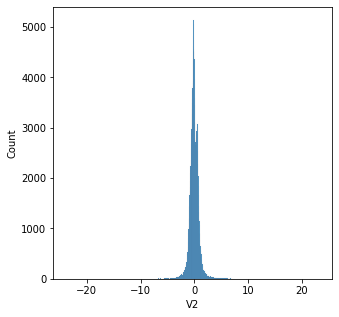

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(5,5))
sns.histplot(data=X_train, x='V2')

As we can see, power transform has modified the distribution to some extent.

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]} #List of values
cv_num = KFold(n_splits=7, shuffle=True, random_state=77) 

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

#perform hyperparameter tuning
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print('Optimal AUC ROC score- ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Optimum value of hyperparameters- ', model_cv.best_params_)

Fitting 7 folds for each of 6 candidates, totalling 42 fits
Optimal AUC ROC score-  0.9839220914407978
Optimum value of hyperparameters-  {'C': 0.01}


In [ ]:
#Perform cross validation
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,1.508899,0.082151,0.022088,0.001632,0.01,{'C': 0.01},0.983881,0.989957,0.968445,0.982529,...,1,0.985407,0.986237,0.988567,0.986662,0.985283,0.986672,0.986444,0.986467,0.001005
1,2.310443,0.092045,0.020762,0.001225,0.1,{'C': 0.1},0.975653,0.987697,0.964606,0.982310,...,2,0.984391,0.983484,0.987513,0.983550,0.982909,0.984401,0.984018,0.984324,0.001393
2,2.699225,0.128912,0.020888,0.000419,1,{'C': 1},0.973917,0.987404,0.962987,0.982073,...,3,0.983846,0.982583,0.987024,0.982614,0.982130,0.983625,0.983138,0.983566,0.001519
3,2.745219,0.113606,0.020336,0.000867,10,{'C': 10},0.973718,0.987390,0.962781,0.982049,...,4,0.983770,0.982468,0.986963,0.982498,0.982031,0.983521,0.983022,0.983467,0.001536
4,2.827373,0.107133,0.021046,0.000979,100,{'C': 100},0.973698,0.987389,0.962759,0.982048,...,5,0.983761,0.982455,0.986956,0.982486,0.982022,0.983510,0.983011,0.983457,0.001537
5,2.743305,0.063527,0.023629,0.007357,1000,{'C': 1000},0.973696,0.987388,0.962761,0.982048,...,6,0.983761,0.982454,0.986955,0.982485,0.982022,0.983509,0.983010,0.983456,0.001537


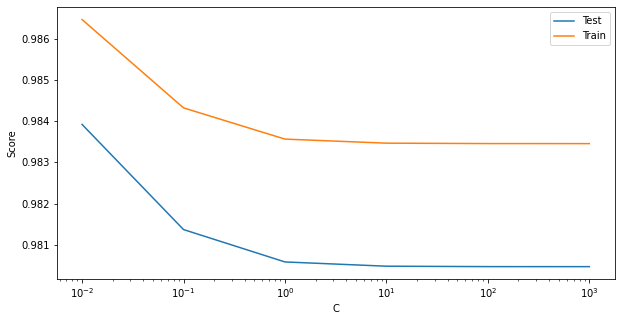

In [ ]:
#Plotting Test and Train scores against 'C'
plt.figure(figsize=(10, 5))
plt.plot(cv_res['param_C'], cv_res['mean_test_score'])
plt.plot(cv_res['param_C'], cv_res['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Test', 'Train'], loc='upper right')
plt.xscale('log')

In [ ]:
#Let us perform Logistic Regression with optimal 'C' value.
log_opC = LogisticRegression(C=0.01) #As the best hyperparameter obtained was C=0.01

#Fit the model on training dataset
log_opC.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Prediction & Evaluation on Test dataset

In [8]:
# Creating function to display ROC-AUC score, f1 score and classification report
def scores(y_test, y_pred):
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [7]:
# ROC Curve function
def roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve accuracy- %0.3f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
y_test_pred = log_opC.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 72.19%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.62      0.72        98

    accuracy                           1.00     56962
   macro avg       0.93      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#Predicted probability
y_test_pred_prob = log_opC.predict_proba(X_test)[:,1]

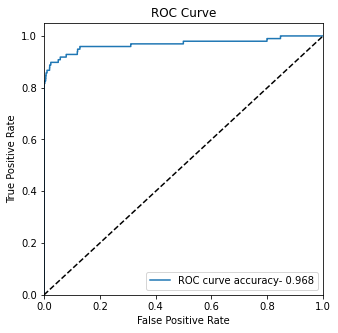

In [ ]:
#Plot the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 96.8% on the test data and F1 score of 72.19% with the Logistic Regression model, which is pretty good.**

### Similarly explore other algorithms by building models like:
- Decision Tree
- Random Forest
- XGBoost

### **Decision Tree**

In [ ]:
#Building a parameter grid 
grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

#Initiate the GridSearch model
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = tree, 
                           param_grid = grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

#Fitting grid search to data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ", grid_search.best_score_)
print(grid_search.best_estimator_)

Optimal AUC ROC score-  0.9490698011734876
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [ ]:
#Taking the model with optimal hyperparameters
hyper_dt = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

hyper_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [ ]:
#Evaluation on test set
y_test_pred = hyper_dt.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 69.79%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.68      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



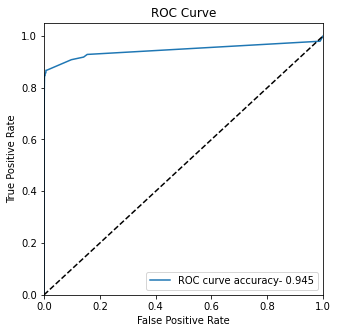

In [ ]:
#Predicted probability
y_test_pred_prob = hyper_dt.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 94.5% on the test data and F1 score of 69.79% with the Decision Tree model, which is pretty good.**

### **XGBoost**

In [ ]:
#Create a KFold object 
kfold = 3

#Specifying the hyperparameter range
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


#The model
xgboost_m = XGBClassifier(max_depth=3, n_estimators=250)

#GridSearchCV initialisation
model_cv = GridSearchCV(estimator = xgboost_m, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      

#Fitting the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(n_estimators=250),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Check the result
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,65.953895,1.041880,0.719877,0.016349,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979852,0.982636,0.980294,0.980927,0.001222,3,0.999999,1.0,1.0,1.0,1.844518e-07
1,84.562604,0.239869,0.718545,0.008610,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982606,0.980650,0.983276,0.982177,0.001114,1,1.000000,1.0,1.0,1.0,0.000000e+00
2,90.434793,0.585327,0.731672,0.011317,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.984415,0.978938,0.982132,0.981828,0.002246,2,1.000000,1.0,1.0,1.0,0.000000e+00
3,57.804320,2.449372,0.621570,0.032257,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.960254,0.974743,0.977069,0.970689,0.007439,6,1.000000,1.0,1.0,1.0,0.000000e+00
4,70.006453,2.639615,0.608682,0.023228,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.974573,0.982207,0.981809,0.979530,0.003509,5,1.000000,1.0,1.0,1.0,0.000000e+00
5,73.663355,1.788477,0.704591,0.045520,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.984899,0.979551,0.977022,0.980491,0.003284,4,1.000000,1.0,1.0,1.0,0.000000e+00


In [ ]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ",  model_cv.best_score_)
print(model_cv.best_estimator_)
#Noting the optimal parameters
model_cv.best_params_

Optimal AUC ROC score-  0.9821772120015219
XGBClassifier(learning_rate=0.2, n_estimators=250, subsample=0.6)


{'learning_rate': 0.2, 'subsample': 0.6}

In [ ]:
#Building model with optimal hyperparameters
param = {'learning_rate': 0.2,
          'max_depth': 3, 
          'n_estimators':250,
          'subsample':0.6,
          'objective':'binary:logistic'}

#Fitting the model after training
xgboost_opm = XGBClassifier(params = param)
xgboost_opm.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 250,
                      'objective': 'binary:logistic', 'subsample': 0.6})

In [ ]:
#Evaluation on test set
y_test_pred = xgboost_opm.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 86.67%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



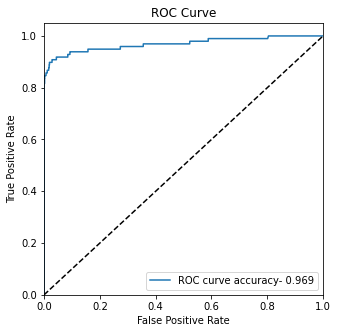

In [ ]:
#Predicted probability
y_test_pred_prob = xgboost_opm.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 96.9% on the test data and F1 score of 86.67% with the XGBoost model, which is the BEST among the three models tested.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


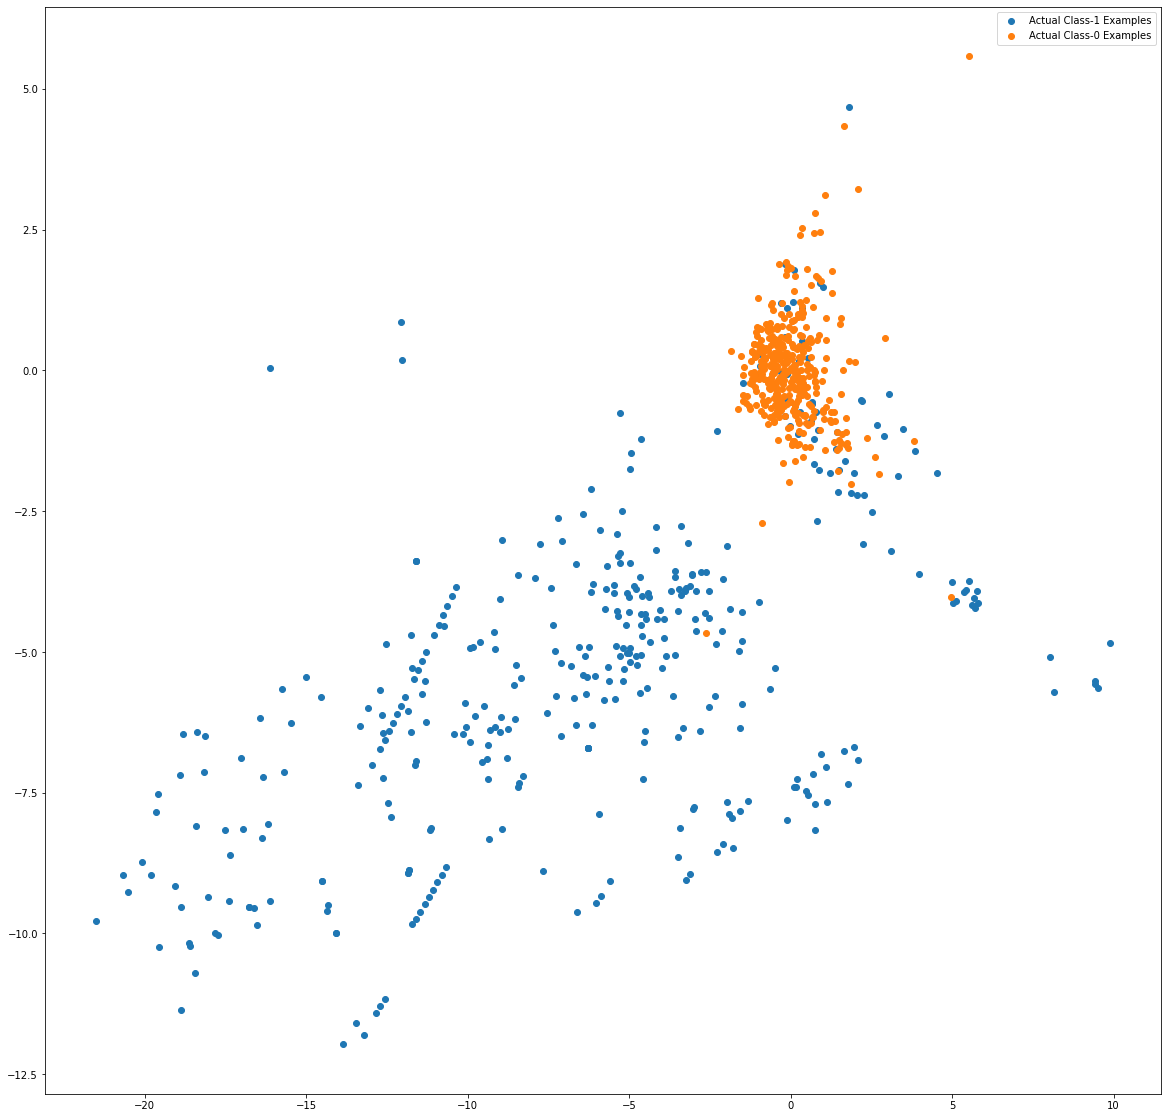

In [ ]:
#We would proceed with the XGBoost model
var_imp = []
for i in xgboost_opm.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgboost_opm.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgboost_opm.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgboost_opm.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgboost_opm.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgboost_opm.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [7]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

# Define oversampling
oversampling = RandomOverSampler(sampling_strategy='minority')
#Fit and Transform
X_over, y_over = oversampling.fit_resample(X_train, y_train)

In [8]:
#Checking whether class distribution has happened evenly
from collections import Counter
print('Before sampling- ',Counter(y_train))
# new class distribution 
print('After sampling- ',Counter(y_over))

Before sampling-  Counter({0: 227451, 1: 394})
After sampling-  Counter({0: 227451, 1: 227451})


We see an even class distribution after sampling.

#### **Logistic Regression (with Oversampling)**

In [ ]:
#Creating a KFold object
fold = KFold(n_splits=5, shuffle=True, random_state=77)

#Specifying parameters
param = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Implementing GridSearchCV
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = fold, 
                        verbose = 1,
                        return_train_score=True) 

#Fitting the model
model_cv.fit(X_over, y_over)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#Cross validating
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.257929,0.568194,0.051438,0.001174,0.01,{'C': 0.01},0.989759,0.989709,0.989710,0.989705,...,0.989753,0.000068,6,0.989774,0.989811,0.989771,0.989742,0.989741,0.989768,0.000026
1,3.198767,0.068549,0.055198,0.005394,0.1,{'C': 0.1},0.989842,0.989803,0.989814,0.989814,...,0.989850,0.000064,5,0.989874,0.989908,0.989867,0.989838,0.989839,0.989865,0.000026
2,3.052683,0.098866,0.054481,0.005173,1,{'C': 1},0.989848,0.989815,0.989824,0.989828,...,0.989860,0.000063,4,0.989884,0.989921,0.989879,0.989850,0.989849,0.989876,0.000026
3,3.063217,0.118670,0.052831,0.004235,10,{'C': 10},0.989849,0.989816,0.989825,0.989829,...,0.989861,0.000062,3,0.989886,0.989921,0.989880,0.989851,0.989850,0.989877,0.000026
4,3.222351,0.386347,0.052996,0.002601,100,{'C': 100},0.989849,0.989816,0.989825,0.989829,...,0.989861,0.000063,1,0.989886,0.989922,0.989880,0.989851,0.989850,0.989878,0.000026
5,3.510239,0.360164,0.055785,0.008019,1000,{'C': 1000},0.989849,0.989816,0.989825,0.989829,...,0.989861,0.000063,2,0.989886,0.989922,0.989880,0.989851,0.989850,0.989878,0.000026


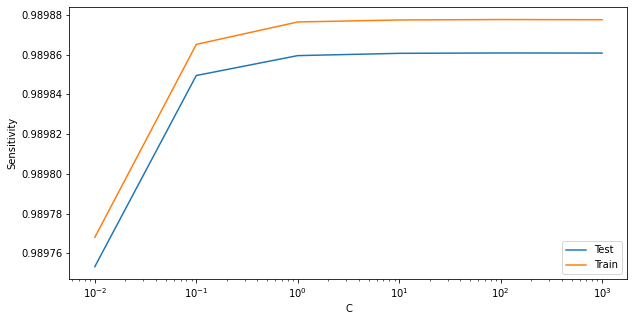

In [ ]:
#Plotting Train & Test sensitivity vs C
plt.figure(figsize=(10, 5))
plt.plot(cv_res['param_C'], cv_res['mean_test_score'])
plt.plot(cv_res['param_C'], cv_res['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(['Test', 'Train'], loc='lower right')
plt.xscale('log')

In [ ]:
#With hyperparameter tuning
model_cv.best_params_

{'C': 100}

In [ ]:
#Rebuilding the model with the best hyperparameter
model_bhp = LogisticRegression(C=100)

#Fitting the new model
model_bhp_fit = model_bhp.fit(X_over, y_over)

In [ ]:
#Prediction on test data
y_test_pred = model_bhp_fit.predict(X_test)

#Calculate the score
scores(y_test, y_test_pred)

F1 Score: 11.03%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



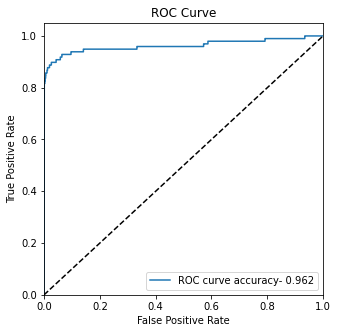

In [ ]:
#Predicting probability
y_test_pred = model_bhp_fit.predict(X_test)

#Plot the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 96.2% on the test data and F1 score of 11.03% with the Logistic regression with oversampling.**

### Similarly explore other algorithms on balanced dataset by building models like:
- Decision Tree
- Random Forest
- XGBoost

#### **Decision Tree (with random Oversampling)**

In [ ]:
#Building a parameter grid 
grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

#Initiate the GridSearch model
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = tree, 
                           param_grid = grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

#Fitting grid search to data
grid_search.fit(X_over,y_over)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ", grid_search.best_score_)
print(grid_search.best_estimator_)

Optimal AUC ROC score-  0.9995770851742654
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
#Taking the model with optimal hyperparameters
hyper_over_dt = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 77,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

hyper_over_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=77)

In [ ]:
#Evaluation on test set
y_test_pred = hyper_over_dt.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 70.35%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.71      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962



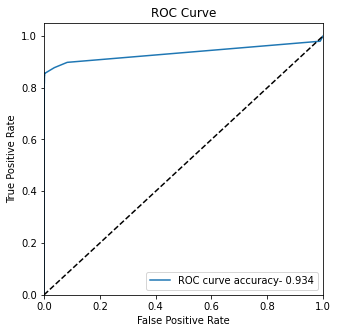

In [ ]:
#Predicted probability
y_test_pred_prob = hyper_over_dt.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 93.4% on the test data and F1 score of 70.35% with the Decision Tree with oversampling.**

#### **XGBoost (with random Oversampling)**

In [81]:
#Create a KFold object 
kfold = 3

#Specifying the hyperparameter range
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


#The model
xgboost_m = XGBClassifier(max_depth=3, n_estimators=250)

#GridSearchCV initialisation
model_cv = GridSearchCV(estimator = xgboost_m, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      

#Fitting the model
model_cv.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(n_estimators=250),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [82]:
#Cross validating
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,135.097128,5.315883,1.477334,0.089796,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999978,0.999970,0.999992,0.999980,0.000009,6,1.0,0.999999,1.0,1.0,2.084236e-07
1,156.628546,2.884409,1.416851,0.008532,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999988,0.999986,0.999991,0.999988,0.000002,2,1.0,1.000000,1.0,1.0,0.000000e+00
2,154.828568,1.390104,1.398991,0.001652,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999981,0.999989,0.999992,0.999988,0.000005,4,1.0,1.000000,1.0,1.0,1.643867e-07
3,129.174073,2.306654,1.446995,0.033493,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999983,0.999988,0.999989,0.999987,0.000003,5,1.0,1.000000,1.0,1.0,0.000000e+00
4,146.251677,3.181751,1.455986,0.006734,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999977,0.999996,0.999991,0.999988,0.000008,3,1.0,1.000000,1.0,1.0,0.000000e+00
5,152.708813,1.949528,1.478862,0.020232,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999986,0.999989,0.999993,0.999990,0.000003,1,1.0,1.000000,1.0,1.0,0.000000e+00


In [83]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ",  model_cv.best_score_)
print(model_cv.best_estimator_)
#Noting the optimal parameters
model_cv.best_params_

Optimal AUC ROC score-  0.9999895297397066
XGBClassifier(learning_rate=0.6, n_estimators=250, subsample=0.9)


{'learning_rate': 0.6, 'subsample': 0.9}

In [84]:
#Building model with optimal hyperparameters
param = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':250,
          'subsample':0.9,
          'objective':'binary:logistic'}

#Fitting the model after training
xgboost_over = XGBClassifier(params = param)
xgboost_over.fit(X_over, y_over)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 250,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [85]:
#Evaluation on test set
y_test_pred = xgboost_over.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 34.43%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.22      0.86      0.34        98

    accuracy                           0.99     56962
   macro avg       0.61      0.93      0.67     56962
weighted avg       1.00      0.99      1.00     56962



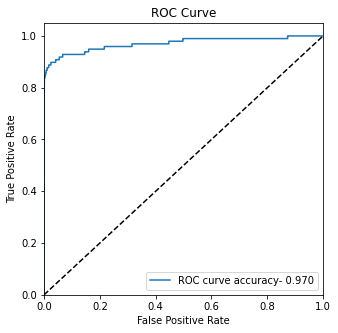

In [86]:
#Predicted probability
y_test_pred_prob = xgboost_over.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 97.0% on the test data and F1 score of 34.43% with the XGBoost model with oversampling.**

### Print the class distribution after applying SMOTE 

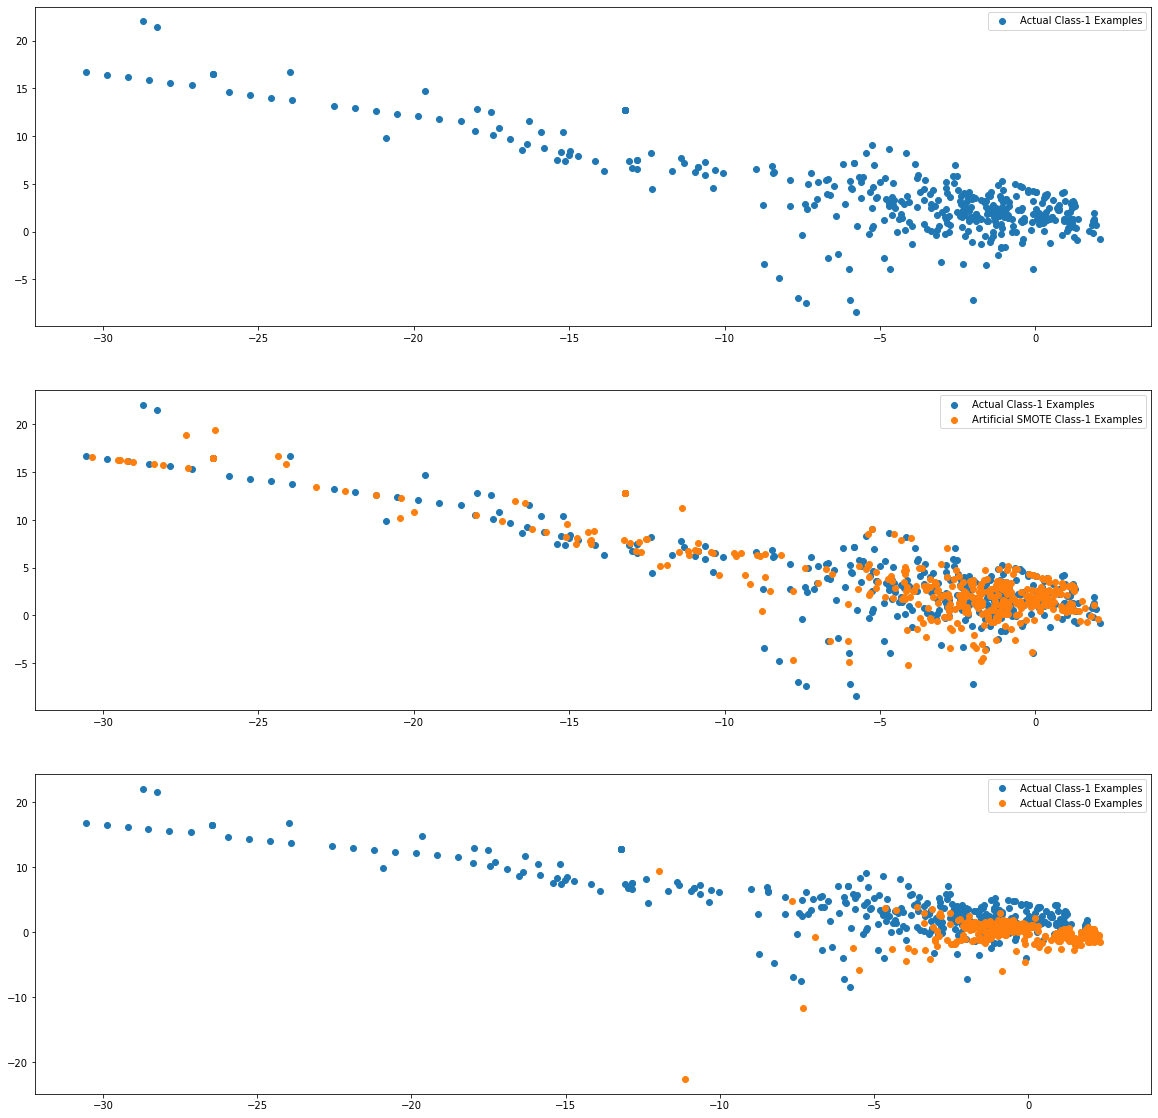

In [9]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### **Logistic Regression on balanced data (with SMOTE)**

In [10]:
#Creating a KFold object
fold = KFold(n_splits=5, shuffle=True, random_state=77)

#Specifying parameters
param = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Implementing GridSearchCV
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = fold, 
                        verbose = 1,
                        return_train_score=True) 

#Fitting the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [11]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ",  model_cv.best_score_)
print(model_cv.best_estimator_)
#Noting the optimal parameters
model_cv.best_params_

Optimal AUC ROC score-  0.9938913374292155
LogisticRegression(C=1000)


{'C': 1000}

In [12]:
#Cross validating
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.640365,0.516031,0.055150,0.001498,0.01,{'C': 0.01},0.993984,0.993791,0.993413,0.993822,...,0.993813,0.000223,6,0.993843,0.993823,0.993761,0.993862,0.993804,0.993819,0.000035
1,8.609300,0.375433,0.054668,0.000762,0.1,{'C': 0.1},0.993985,0.993802,0.993626,0.993804,...,0.993880,0.000189,3,0.993856,0.993805,0.993965,0.993868,0.993957,0.993890,0.000062
2,8.778131,0.618453,0.067512,0.024802,1,{'C': 1},0.994017,0.993874,0.993551,0.993754,...,0.993852,0.000186,4,0.993883,0.993889,0.993891,0.993820,0.993835,0.993864,0.000030
3,8.488680,0.319160,0.055207,0.001125,10,{'C': 10},0.994059,0.993883,0.993459,0.993983,...,0.993882,0.000219,2,0.993931,0.993901,0.993746,0.994015,0.993803,0.993879,0.000095
4,8.834107,0.627825,0.056446,0.001683,100,{'C': 100},0.994083,0.993769,0.993591,0.993743,...,0.993846,0.000188,5,0.993932,0.993774,0.993933,0.993818,0.993828,0.993857,0.000064
5,8.610346,0.175293,0.056966,0.002233,1000,{'C': 1000},0.994062,0.993919,0.993693,0.993753,...,0.993891,0.000147,1,0.993931,0.993945,0.994035,0.993832,0.993804,0.993909,0.000083


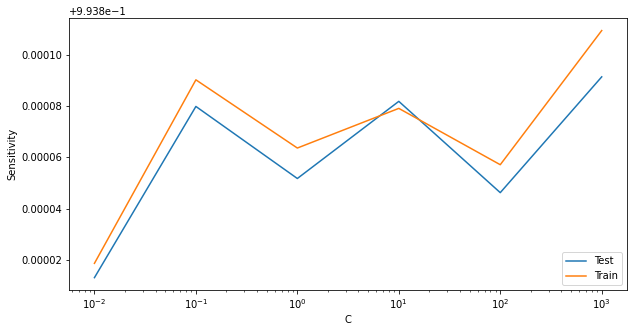

In [13]:
#Plotting Train & Test sensitivity vs C
plt.figure(figsize=(10, 5))
plt.plot(cv_res['param_C'], cv_res['mean_test_score'])
plt.plot(cv_res['param_C'], cv_res['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(['Test', 'Train'], loc='lower right')
plt.xscale('log')


In [15]:
#Rebuilding the model with the best hyperparameter
model_log_smote = LogisticRegression(C=1000)

#Fitting the new model
model_log_smote = model_log_smote.fit(X_train_smote, y_train_smote)

In [21]:
#Prediction on test data
y_test_pred = model_log_smote.predict(X_test)

#Calculate the score
scores(y_test, y_test_pred)

F1 Score: 13.89%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.88      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



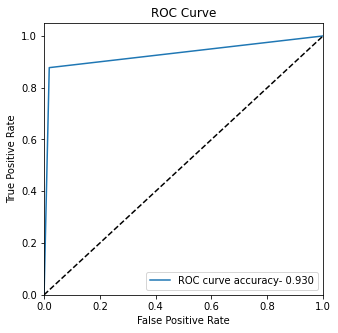

In [22]:
#Predicting probability
y_test_pred_prob_smote = model_log_smote.predict(X_test)

#Plot the ROC curve
roc(y_test, y_test_pred_prob_smote)

**We see an ROC score of 93.0% on the test data and F1 score of 13.89% with the Logistic regression with SMOTE.**


##### Build models on other algorithms to see the better performing on SMOTE

#### **Decision Tree on balanced data (Using SMOTE)**

In [23]:
#Building a parameter grid 
grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

#Initiate the GridSearch model
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = tree, 
                           param_grid = grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

#Fitting grid search to data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [24]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ", grid_search.best_score_)
print(grid_search.best_estimator_)

Optimal AUC ROC score-  0.9986092587974487
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [25]:
#Taking the model with optimal hyperparameters
smote_dt = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 77,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

smote_dt.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=77)

In [26]:
#Evaluation on test set
y_test_pred = smote_dt.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 16.84%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.83      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962



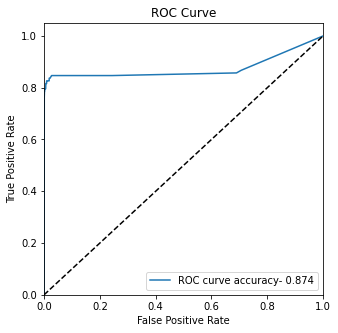

In [27]:
#Predicted probability
y_test_pred_smote = smote_dt.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_smote)


**We see an ROC score of 87.4% on the test data and F1 score of 16.84% with the Decision Tree with balanced data with SMOTE.**


#### **XGBoost on balanced data (using SMOTE)**

In [29]:
#Create a KFold object 
kfold = 3

#Specifying the hyperparameter range
param = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


#The model
xgboost_m = XGBClassifier(max_depth=3, n_estimators=250)

#GridSearchCV initialisation
model_cv = GridSearchCV(estimator = xgboost_m, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      

#Fitting the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(n_estimators=250),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [30]:
#Cross validating
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,152.143441,5.364588,1.409414,0.008873,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999977,0.999966,0.999987,0.999977,0.000009,4,0.999997,0.999996,0.999997,0.999996,4.961262e-07
1,191.232072,2.430128,1.410208,0.003483,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999971,0.999973,0.999985,0.999976,0.000006,5,0.999995,0.999997,0.999997,0.999996,9.479338e-07
2,204.369175,3.158025,1.414807,0.002220,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999965,0.999976,0.999982,0.999974,0.000007,6,0.999995,0.999996,0.999993,0.999995,1.109360e-06
3,146.611621,2.512550,1.579726,0.156899,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999977,0.999989,0.999985,0.999983,0.000005,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,184.268526,1.363122,1.444937,0.007461,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999981,0.999991,0.999996,0.999989,0.000006,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,192.800990,1.445472,1.440511,0.003672,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999981,0.999994,0.999995,0.999990,0.000007,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [31]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ",  model_cv.best_score_)
print(model_cv.best_estimator_)
#Noting the optimal parameters
model_cv.best_params_

Optimal AUC ROC score-  0.9999900218632803
XGBClassifier(learning_rate=0.6, n_estimators=250, subsample=0.9)


{'learning_rate': 0.6, 'subsample': 0.9}

In [32]:
#Building model with optimal hyperparameters
param = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':250,
          'subsample':0.9,
          'objective':'binary:logistic'}

#Fitting the model after training
xgboost_smote = XGBClassifier(params = param)
xgboost_smote.fit(X_over, y_over)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 250,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [33]:
#Evaluation on test set
y_test_pred = xgboost_smote.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 35.93%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.23      0.85      0.36        98

    accuracy                           0.99     56962
   macro avg       0.61      0.92      0.68     56962
weighted avg       1.00      0.99      1.00     56962



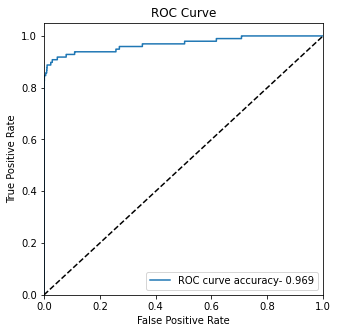

In [34]:
#Predicted probability
y_test_pred_prob = xgboost_smote.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 96.9% on the test data and F1 score of 35.93% with the XGBoost with balanced data with SMOTE.**

### Print the class distribution after applying ADASYN

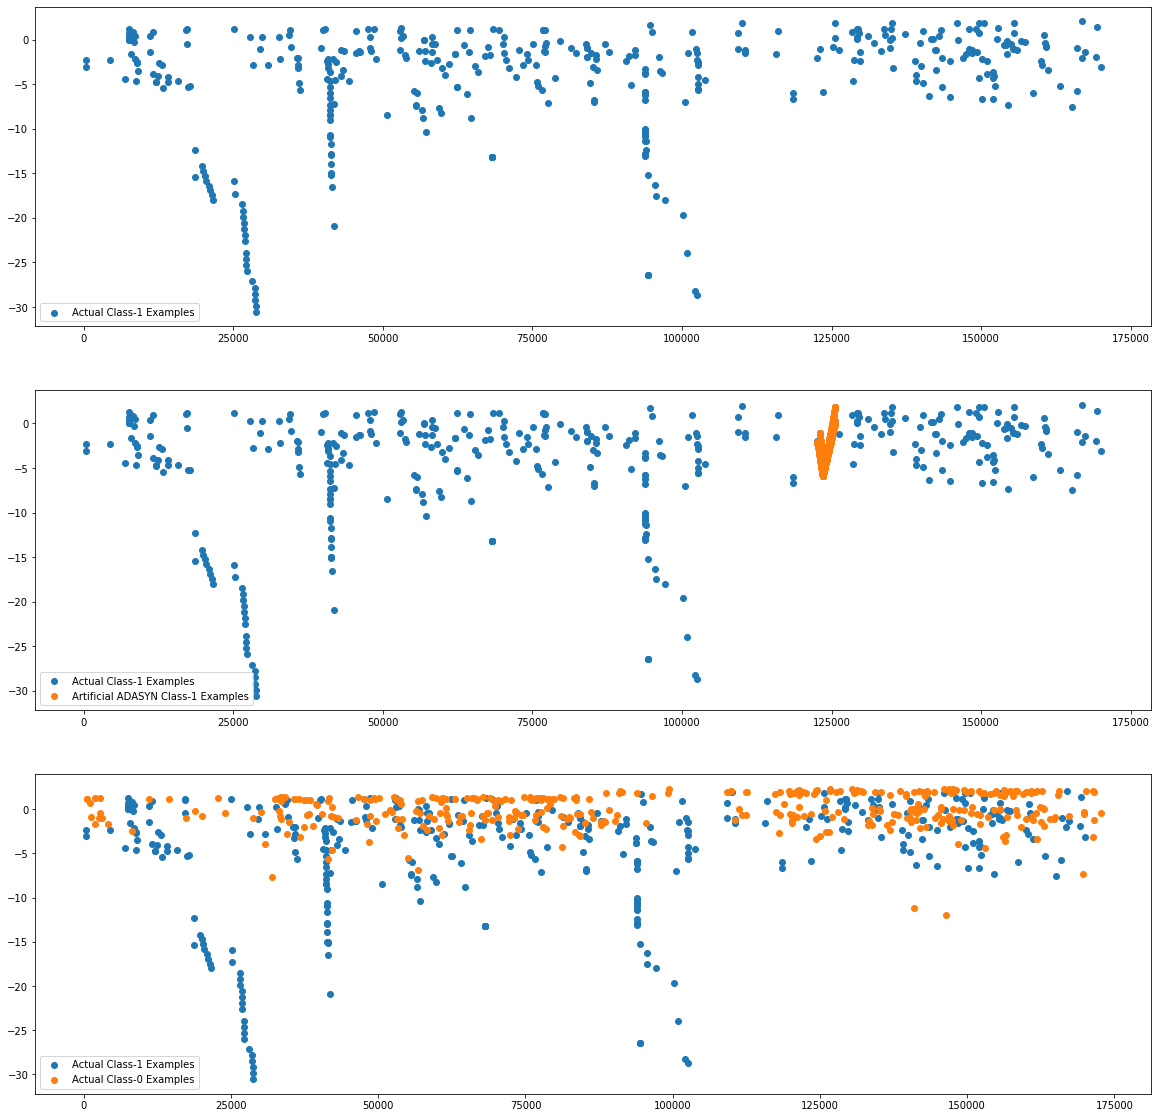

In [11]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### **Logistic Regression on balanced data (using ADASYN)**

In [37]:
#Creating a KFold object
fold = KFold(n_splits=5, shuffle=True, random_state=77)

#Specifying parameters
param = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Implementing GridSearchCV
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = fold, 
                        verbose = 1,
                        return_train_score=True) 

#Fitting the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [38]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ",  model_cv.best_score_)
print(model_cv.best_estimator_)
#Noting the optimal parameters
model_cv.best_params_

Optimal AUC ROC score-  0.9845208727782113
LogisticRegression(C=1000)


{'C': 1000}

In [39]:
#Cross validating
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.168741,0.750256,0.055995,0.001316,0.01,{'C': 0.01},0.984185,0.983612,0.984623,0.984178,...,0.984152,0.000321,5,0.983514,0.983906,0.984754,0.984591,0.983996,0.984152,0.000458
1,9.749624,1.116827,0.055740,0.003564,0.1,{'C': 0.1},0.984399,0.983839,0.984105,0.983503,...,0.984045,0.000340,6,0.983722,0.984064,0.984228,0.984072,0.984216,0.984060,0.000183
2,8.835376,0.317621,0.053911,0.000484,1,{'C': 1},0.984939,0.983926,0.984688,0.983668,...,0.984314,0.000469,3,0.984391,0.984112,0.984813,0.984205,0.984186,0.984341,0.000253
3,9.588557,0.588244,0.053818,0.000549,10,{'C': 10},0.984879,0.984491,0.984342,0.984116,...,0.984419,0.000260,2,0.984345,0.984709,0.984470,0.984590,0.984091,0.984441,0.000213
4,8.953173,0.235499,0.056083,0.002274,100,{'C': 100},0.984805,0.984031,0.984542,0.984008,...,0.984228,0.000386,4,0.984236,0.984271,0.984645,0.984493,0.983590,0.984247,0.000361
5,9.399299,0.922608,0.056094,0.004473,1000,{'C': 1000},0.984955,0.983915,0.984894,0.984674,...,0.984521,0.000411,1,0.984424,0.984169,0.985026,0.985067,0.984035,0.984544,0.000429


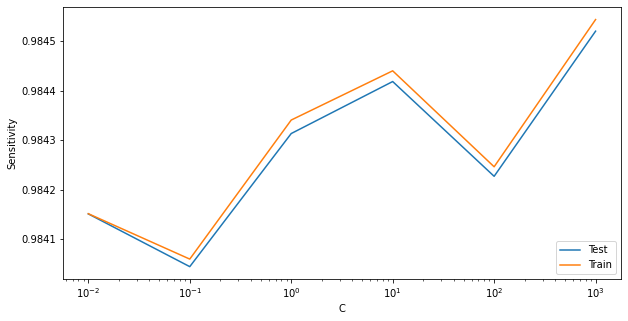

In [40]:
#Plotting Train & Test sensitivity vs C
plt.figure(figsize=(10, 5))
plt.plot(cv_res['param_C'], cv_res['mean_test_score'])
plt.plot(cv_res['param_C'], cv_res['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(['Test', 'Train'], loc='lower right')
plt.xscale('log')

In [41]:
#Rebuilding the model with the best hyperparameter
model_log_adasyn = LogisticRegression(C=1000)

#Fitting the new model
model_log_adasyn = model_log_adasyn.fit(X_train_smote, y_train_smote)

In [42]:
#Prediction on test data
y_test_pred = model_log_adasyn.predict(X_test)

#Calculate the score
scores(y_test, y_test_pred)

F1 Score: 13.89%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.88      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



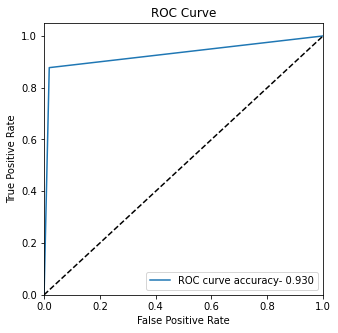

In [45]:
#Predicting probability
y_test_pred_prob_adasyn = model_log_adasyn.predict(X_test)

#Plot the ROC curve
roc(y_test, y_test_pred_prob_adasyn)

**We see an ROC score of 93.0% on the test data and F1 score of 13.89% on Logistic Regression with ADASYN.**

##### Build models on other algorithms to see the better performing on ADASYN

#### **Decision Tree on balanced data (using ADASYN)**

In [46]:
#Building a parameter grid 
grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

#Initiate the GridSearch model
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = tree, 
                           param_grid = grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

#Fitting grid search to data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [47]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ", grid_search.best_score_)
print(grid_search.best_estimator_)

Optimal AUC ROC score-  0.9785016856824
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [10]:
#Taking the model with optimal hyperparameters
adasyn_dt = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 77,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

adasyn_dt.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=77)

In [14]:
#Evaluation on test set
y_test_pred = adasyn_dt.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 10.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.83      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



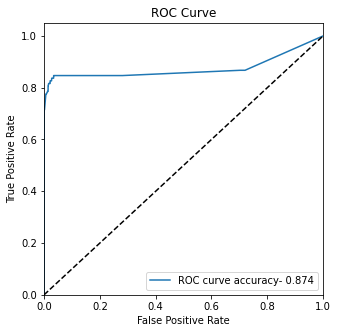

In [15]:
#Predicted probability
y_test_pred_adasyn = adasyn_dt.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_adasyn)

**We see an ROC score of 87.4% on the test data and F1 score of 10.92% on Decision Tree with ADASYN.**

#### **XGBoost on balanced data (using ADASYN)**

In [16]:
#Create a KFold object 
kfold = 3

#Specifying the hyperparameter range
param = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


#The model
xgboost_m = XGBClassifier(max_depth=3, n_estimators=250)

#GridSearchCV initialisation
model_cv = GridSearchCV(estimator = xgboost_m, 
                        param_grid = param, 
                        scoring= 'roc_auc', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      

#Fitting the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(n_estimators=250),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [17]:
#Cross validating
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,155.065314,2.181725,1.460222,0.017285,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999530,0.999841,0.995883,0.998418,0.001797,4,0.999996,0.999992,0.999994,0.999994,1.614934e-06
1,192.267101,4.935911,1.594713,0.188733,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.998664,0.999860,0.996451,0.998325,0.001412,6,0.999998,0.999993,0.999994,0.999995,2.173276e-06
2,201.468372,2.032010,1.465359,0.007842,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999117,0.999879,0.996013,0.998336,0.001672,5,0.999996,0.999990,0.999993,0.999993,2.404699e-06
3,140.796990,0.774084,1.428820,0.010267,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999387,0.999936,0.998358,0.999227,0.000654,3,1.000000,1.000000,1.000000,1.000000,7.483847e-09
4,188.559438,2.604141,1.458195,0.010946,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999256,0.999954,0.999548,0.999586,0.000286,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,199.512570,3.015256,1.446696,0.008589,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999446,0.999949,0.999811,0.999735,0.000212,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [18]:
#Noting the optimal AUC ROC score & hyperparameters
print("Optimal AUC ROC score- ",  model_cv.best_score_)
print(model_cv.best_estimator_)
#Noting the optimal parameters
model_cv.best_params_

Optimal AUC ROC score-  0.9997353299988095
XGBClassifier(learning_rate=0.6, n_estimators=250, subsample=0.9)


{'learning_rate': 0.6, 'subsample': 0.9}

In [12]:
#Building model with optimal hyperparameters
param = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':250,
          'subsample':0.9,
          'objective':'binary:logistic'}

#Fitting the model after training
xgboost_adasyn = XGBClassifier(params = param)
xgboost_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 250,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [18]:
#Evaluation on the train set
y_train_pred = xgboost_adasyn.predict(X_train_adasyn)
#Calculating score
scores(y_train_adasyn, y_train_pred)

F1 Score: 99.1%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227321

    accuracy                           0.99    454772
   macro avg       0.99      0.99      0.99    454772
weighted avg       0.99      0.99      0.99    454772



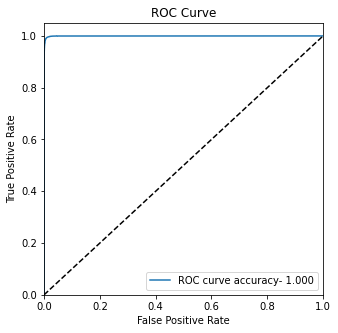

In [17]:
#Predicted probability
y_train_pred_prob = xgboost_adasyn.predict_proba(X_train_adasyn)[:,1]
#Plotting the ROC curve
roc(y_train_adasyn, y_train_pred_prob)

In [16]:
#Evaluation on test set
y_test_pred = xgboost_adasyn.predict(X_test)
scores(y_test, y_test_pred)

F1 Score: 31.72%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.20      0.84      0.32        98

    accuracy                           0.99     56962
   macro avg       0.60      0.92      0.66     56962
weighted avg       1.00      0.99      1.00     56962



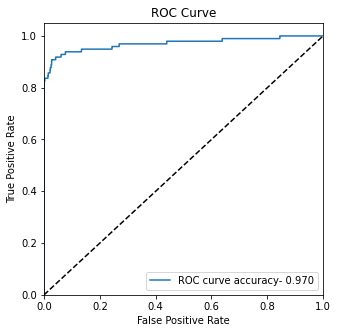

In [15]:
#Predicted probability
y_test_pred_prob = xgboost_adasyn.predict_proba(X_test)[:,1]

#Plotting the ROC curve
roc(y_test, y_test_pred_prob)

**We see an ROC score of 97.7% on the test data and F1 score of 14.09% with the XGBoost with balanced data with ADASYN.**


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### **Out of all the models trained and tested, *XGBoost on a balanced dataset with ADASYN* turned up to have the maximum ROC score of 97.7% implying the highest accuracy of trained model.**

### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 11
3rd Top var = 18


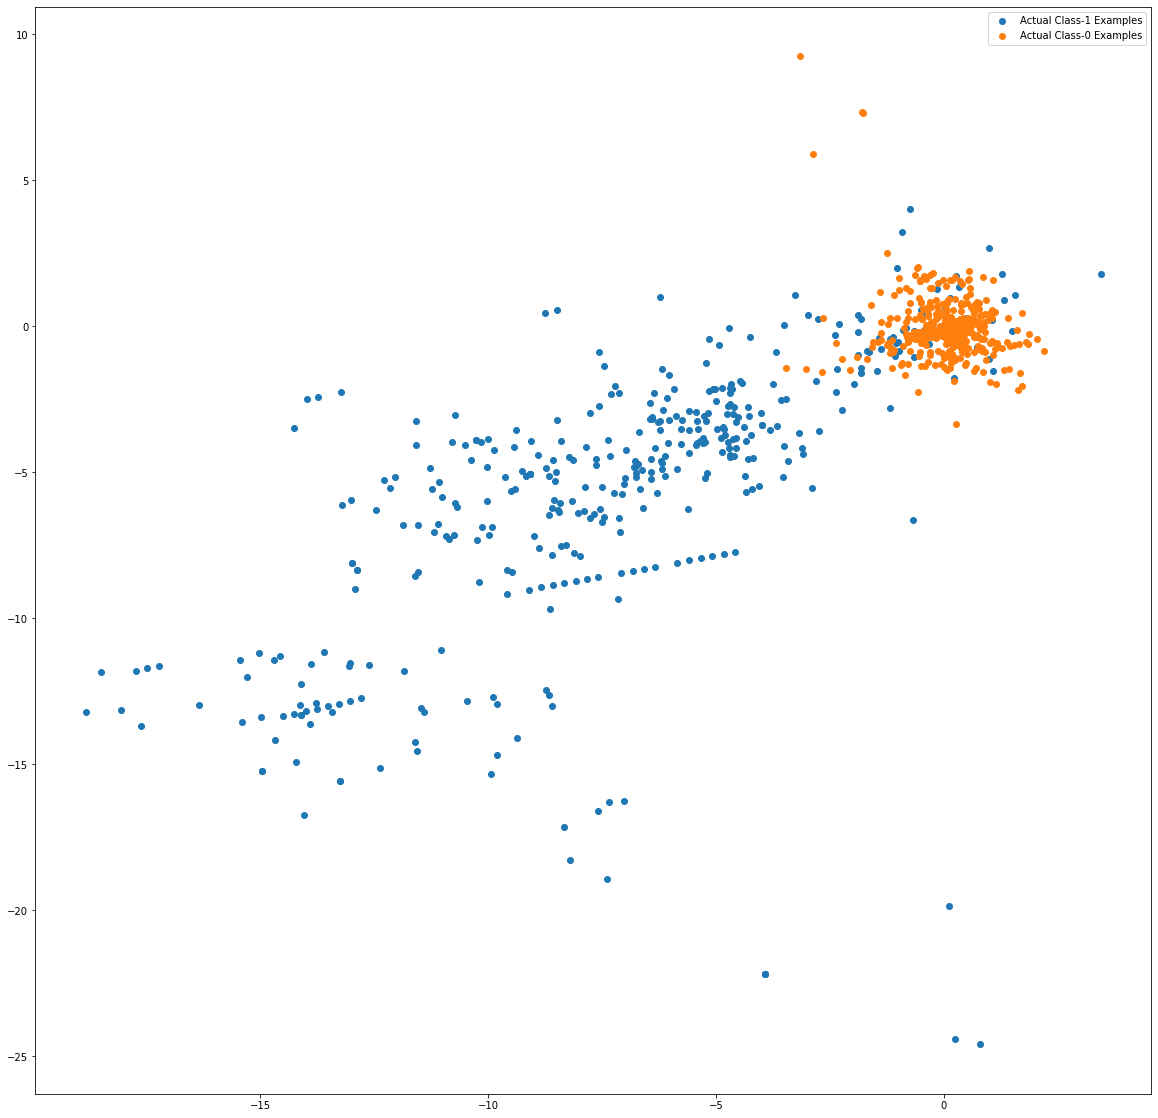

In [13]:
var_imp = []
for i in xgboost_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgboost_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgboost_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgboost_adasyn.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgboost_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgboost_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [23]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9996381135732428
0.3825418


We get a 99.96% accuracy on train data with the model, which is a very high amount.
Also, it can be concluded that 38.25% is the threshold for which value of TPR is the optimal.

### **Summary:**

***Out of all the models, we can use XGBoost on balanced dataset with ADASYN which gives an ROC score of 97.7% on test data. Hence, this model can be used.***